In [ ]:
#importing libraries

In [1]:
import tensorflow as tf
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/

 archive.zip					    Screenshot_2024-06-18-19-37-52-755_com.jpg
'Colab Notebooks'				    Screenshot_2024-06-18-19-43-11-497_com.jpg
 dbms.png					    Screenshot_2024-06-18-19-43-44-479_com.jpg
'Green Clean Botanical Presentation (1) (1).pptx'   Screenshot_2024-07-01-18-26-17-014_com.jpg
 IMG-20240618-WA0002.jpg			    Screenshot_2024-07-01-18-54-18-115_com.jpg
'Machine Learning Lab File.docx'		    Screenshot_2024-07-01-18-54-29-121_com.jpg
'mid term sem1.gdoc'				    Screenshot_2024-07-01-18-55-02-701_com.jpg
'mid term sem1.pdf'				    Sommay065Mca.jpg
 pg_management.zip				    sommay065McaLikes.jpg
 reel.zip					    sommay065mcaStory.jpg
 ritika_12_mentee				    Sommmay065Mca.jpg
'Screenshot 2023-12-09 172905 (1).png'		    taniya_11_mentee
'Screenshot 2023-12-09 172905.png'


In [4]:
!cp /content/drive/MyDrive/archive.zip /content/


In [5]:
!unzip /content/archive.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflatin

In [6]:
!ls /content/

 archive.zip  'new plant diseases dataset(augmented)'   sample_data
 drive	      'New Plant Diseases Dataset(Augmented)'   test


In [7]:
!ls /content/New\ Plant\ Diseases\ Dataset\(Augmented\)/

'New Plant Diseases Dataset(Augmented)'


# Data Preprocessing


## Training image preprocessing

In [8]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing


In [9]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True,
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[143.75 138.75 145.75]
   [144.   139.   146.  ]
   [145.75 140.75 147.75]
   ...
   [174.   168.   170.  ]
   [170.5  164.5  166.5 ]
   [184.75 178.75 180.75]]

  [[141.75 136.75 143.75]
   [145.25 140.25 147.25]
   [159.25 154.25 161.25]
   ...
   [176.25 170.25 172.25]
   [177.75 171.75 173.75]
   [173.5  167.5  169.5 ]]

  [[147.75 142.75 149.75]
   [142.25 137.25 144.25]
   [152.5  147.5  154.5 ]
   ...
   [182.   176.   178.  ]
   [186.25 180.25 182.25]
   [174.75 168.75 170.75]]

  ...

  [[ 76.    66.    74.  ]
   [ 83.5   73.5   81.5 ]
   [ 85.5   75.5   83.5 ]
   ...
   [ 97.5   86.5   92.5 ]
   [101.5   90.5   96.5 ]
   [102.5   91.5   97.5 ]]

  [[ 79.5   69.5   77.5 ]
   [ 82.    72.    80.  ]
   [ 85.25  75.25  83.25]
   ...
   [ 96.75  85.75  91.75]
   [ 97.5   86.5   92.5 ]
   [ 96.    85.    91.  ]]

  [[ 86.25  76.25  84.25]
   [ 82.75  72.75  80.75]
   [ 83.5   73.5   81.5 ]
   ...
   [ 96.5   85.5   91.5 ]
   [ 94.75  83.75  89.75]
   [ 91.5   80.5   8

To avoid overshooting:-

1.   Choose small learning rate default 0.001 we are taking 0.0001
2.   There may be chance of underfitting, so increase number of neurons.
3.   Add more convolution layer to extract more feature from images as there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more  feature.



###Building Model


In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential

In [13]:
model=Sequential()
# building convulation layer

In [14]:
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
model.add(Dropout(0.25)) #to avoid overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1000, activation='relu'))

In [21]:
model.add(Dropout(0.25))

In [22]:
# output layer
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       9,217,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,427,294 (39.78 MB)

 Trainable params: 10,427,294 (39.78 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [28]:
training_history=model.fit(training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10416s 5s/step - accuracy: 0.4995 - loss: 1.9144 - val_accuracy: 0.8703 - val_loss: 0.4025
Epoch 2/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10458s 5s/step - accuracy: 0.8636 - loss: 0.4308 - val_accuracy: 0.9000 - val_loss: 0.3089
Epoch 3/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10361s 5s/step - accuracy: 0.9214 - loss: 0.2410 - val_accuracy: 0.9342 - val_loss: 0.2127


## Model Evaluation

In [29]:
# Model Evaluation in Training set
train_loss, train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2567s 1s/step - accuracy: 0.9587 - loss: 0.1269


In [30]:
print(train_loss, train_acc)

0.10974473506212234 0.9642080068588257


In [31]:
#model on validation set
val_loss, val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.9339 - loss: 0.2143


In [32]:
print(val_loss, val_acc)

0.21272967755794525 0.9342135190963745


## Saving Model

In [33]:
model.save("trained_model.keras") #.h5

In [34]:
training_history.history

{'accuracy': [0.6771320700645447, 0.8828508257865906, 0.9300661683082581],
 'loss': [1.1135048866271973, 0.36644306778907776, 0.21386194229125977],
 'val_accuracy': [0.8703050017356873, 0.8999544978141785, 0.9342135190963745],
 'val_loss': [0.402498722076416, 0.30887410044670105, 0.2127295732498169]}

In [35]:
#recording history in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

### Accuracy Visualization

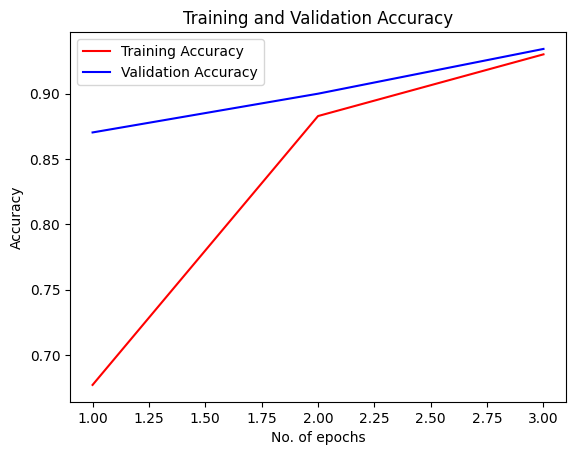

In [37]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


### Some other matrix for model evaluation

In [38]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [40]:
y_pred=model.predict(test_set)
y_pred, y_pred.shape

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2593s 1s/step


(array([[9.91443932e-01, 6.89517183e-05, 2.65992071e-07, ...,
         1.03980415e-10, 1.59633279e-10, 1.46669754e-06],
        [9.99182999e-01, 4.60840783e-06, 5.44499379e-09, ...,
         3.34207151e-09, 8.07146705e-09, 1.23105053e-07],
        [9.99474823e-01, 2.79393789e-05, 5.70640601e-08, ...,
         2.94341262e-08, 2.78372340e-06, 1.92250923e-06],
        ...,
        [1.45920567e-10, 4.60906183e-12, 9.87882900e-11, ...,
         4.20648124e-15, 3.33756967e-10, 9.99691129e-01],
        [1.60871267e-07, 7.71254338e-10, 4.21082919e-10, ...,
         1.17466046e-11, 1.74836980e-08, 9.42518592e-01],
        [1.31345260e-07, 5.63843416e-11, 4.44855654e-12, ...,
         3.05400032e-16, 4.38851282e-11, 9.99746025e-01]], dtype=float32),
 (70295, 38))

In [41]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [42]:
true_category=tf.concat([y for x,y in test_set],axis=0)
true_category

<tf.Tensor: shape=(70295, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
Y_true=tf.argmax(true_category,axis=1)
Y_true

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
classification_report(Y_true,predicted_categories, target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.99      0.95      0.97      2016\n                                 Apple___Black_rot       1.00      0.97      0.98      1987\n                          Apple___Cedar_apple_rust       0.87      1.00      0.93      1760\n                                   Apple___healthy       0.97      0.95      0.96      2008\n                               Blueberry___healthy       0.96      0.97      0.96      1816\n          Cherry_(including_sour)___Powdery_mildew       0.93      0.99      0.96      1683\n                 Cherry_(including_sour)___healthy       0.98      0.99      0.98      1826\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.98      0.96      1642\n                       Corn_(maize)___Common_rust_       1.00      1.00      1.00      1907\n               Corn_(maize)___Northern_Leaf_Blight       0.99      

In [46]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[1907,    6,   12, ...,    0,    2,    3],
       [   1, 1935,    3, ...,    0,    0,    0],
       [   0,    0, 1755, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1944,    0,    0],
       [   0,    0,    1, ...,    0, 1774,    0],
       [   0,    0,    2, ...,    0,    0, 1719]])

### Confusion matrix visualization

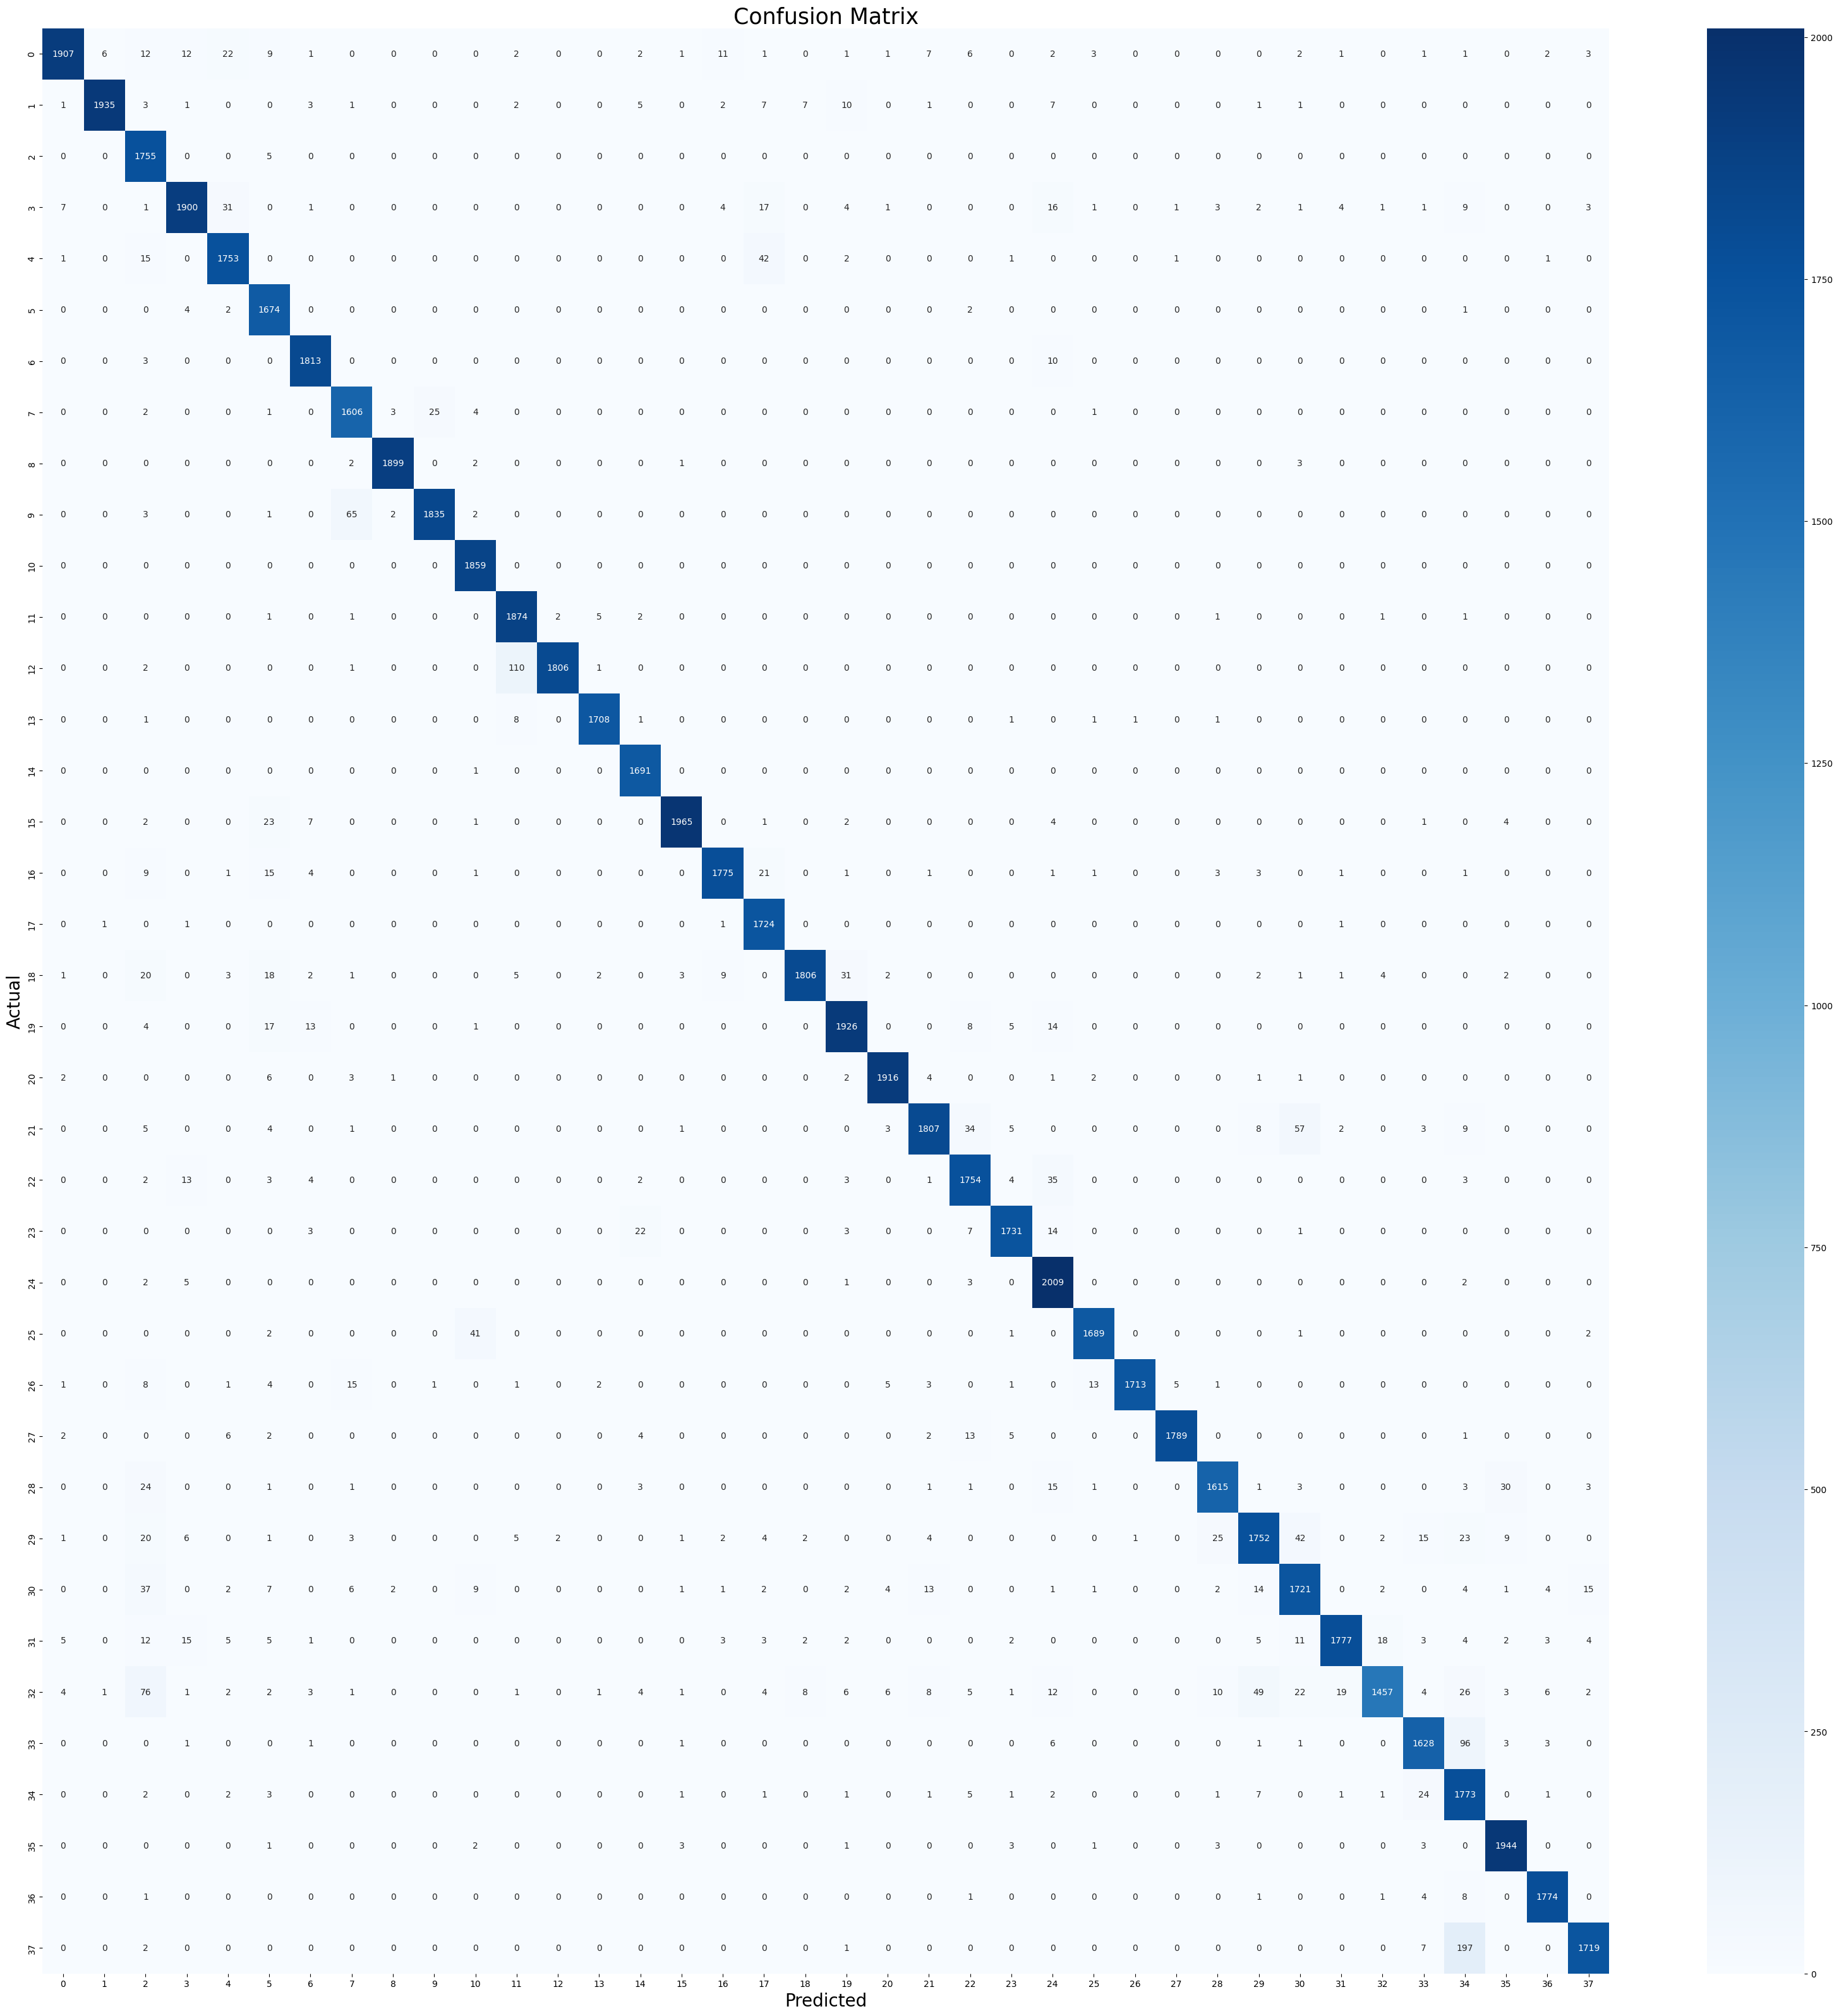

In [48]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size': 10}, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

# testing the model

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [50]:
model = tf.keras.models.load_model('trained_model.keras')

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       9,217,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,281,884 (119.33 MB)

 Trainable params: 10,427,294 (39.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,854,590 (79.55 MB)

## Visualizing single image of Test Set

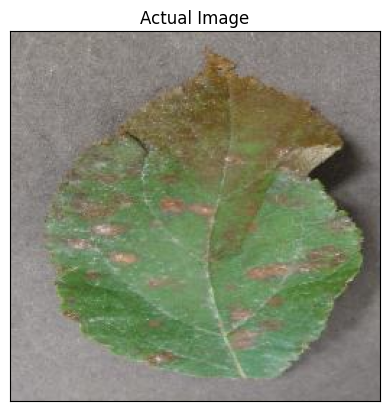

In [53]:
import cv2
image_path="/content/test/test/AppleCedarRust4.JPG"

#reading image
img=cv2.imread(image_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert bgr image to rgb image

#displaying image
plt.imshow(img)
plt.title("Actual Image")
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [64]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.expand_dims(input_arr, axis=0) #convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [65]:
input_arr = input_arr / 255.0
prediction = model.predict(input_arr)
print(prediction.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
(1, 38)


In [66]:
result_index=np.argmax(prediction)
result_index

7

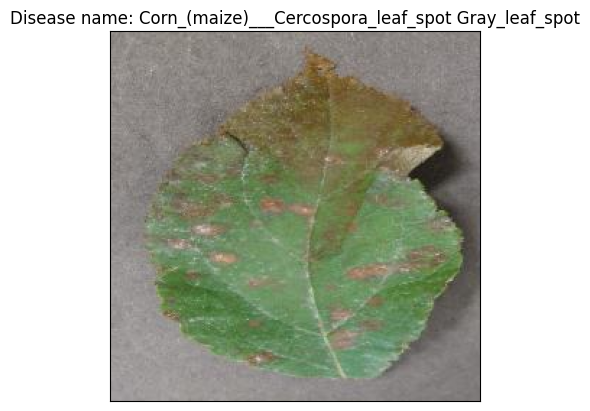

In [68]:
#displaying result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [69]:
model_prediction

'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'